In [28]:
#Load MyPrettyPrinter
%run MyPrettyPrinter
%matplotlib inline

#Load EPL Data from fantasy.premierleague.com
%run getDataPL

#import cPickle as pickle
#date_text = '2016_07_27'
#players = pickle.load(open(date_text + '_player_data.p'))
#all_data = pickle.load(open(date_text + '_all_data.p'))

/Users/Matt/anaconda3/envs/Python2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Matt/anaconda3/envs/Python2.7/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


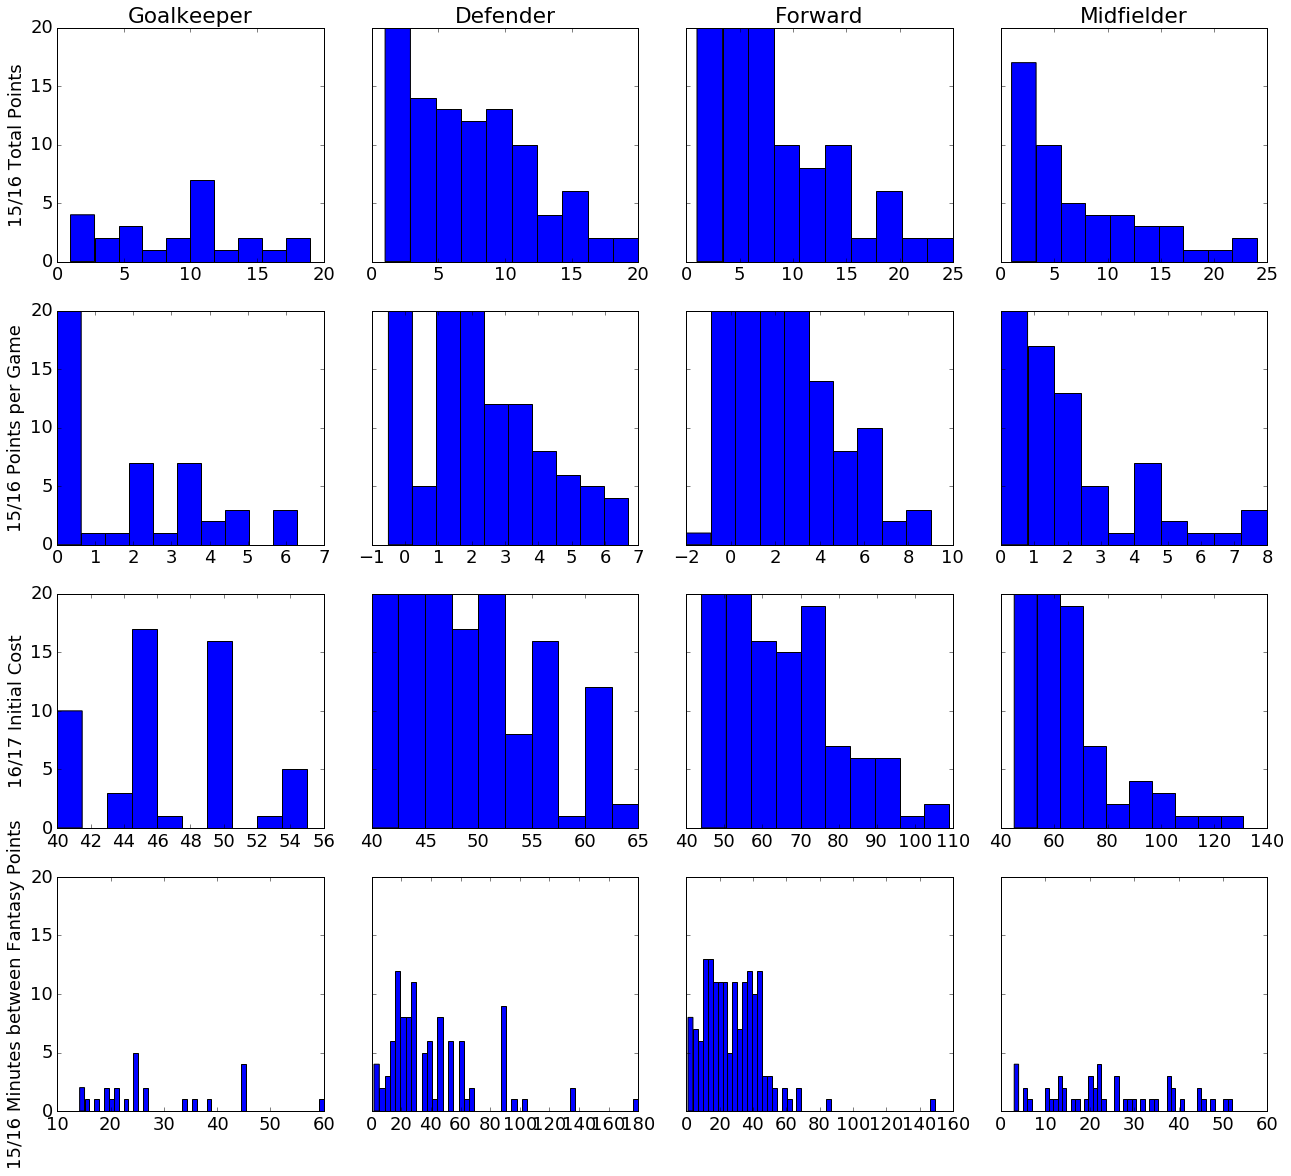

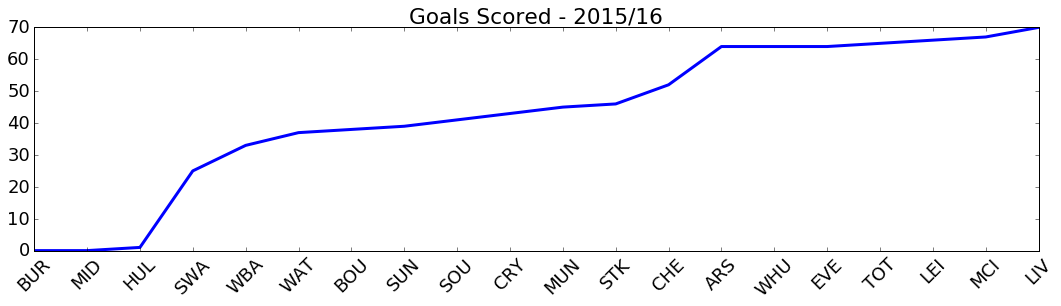

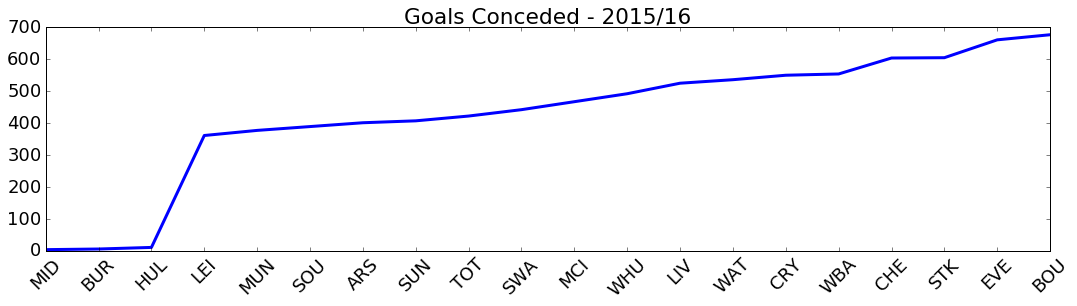

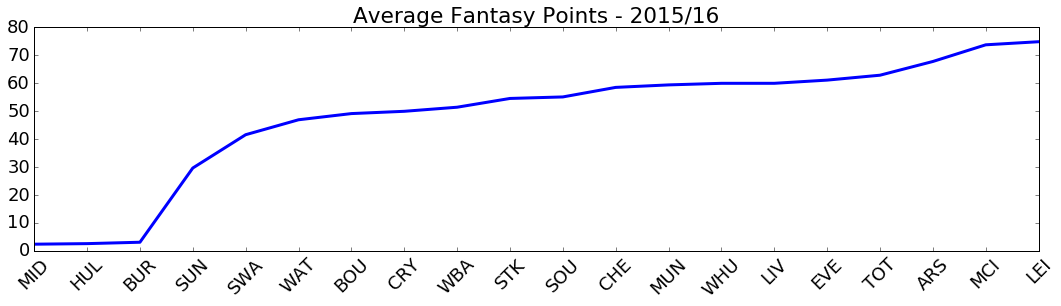

In [2]:
from collections import OrderedDict
import numpy as np

stat_types = ["'goals_scored'", "'goals_conceded'", "'total_points'"]
def report_team_data(metric,all_data):
    team_metric = {}
    for i in range(21):
        metric_temp = []
        for player in all_data:
            if player['team'] == i:
                try:
                    for season in player['history_past']:
                        if season['season_name'] == '2015/16':
                            metric_temp.append(season[metric])
                        if len(metric_temp)<1:
                            metric_temp.append(0)
                except:
                    metric_temp.append(0)
                finally:
                    if metric == 'goals_scored':
                        team_metric[teams_short[i]] = np.sum(metric_temp)
                        title = 'Goals Scored - 2015/16'
                    if metric == 'goals_conceded':
                        team_metric[teams_short[i]] = np.sum(metric_temp)
                        title = 'Goals Conceded - 2015/16'
                    if metric == 'total_points':
                        team_metric[teams_short[i]] = np.average(metric_temp)
                        title = 'Average Fantasy Points - 2015/16'

    sorted_avgs = OrderedDict(sorted(team_metric.items(),key=lambda t: t[1]))
    fig, ax = plt.subplots(figsize=(18,4))

    x_pos = np.arange(0,len(sorted_avgs.keys()))
    ax.set_xticks(x_pos)
    ax.set_title(title)
    ax.set_xticklabels(sorted_avgs.keys(),rotation=45)
    ax.plot(x_pos,sorted_avgs.values(),linewidth=3)
    fig.show()
    
#MyPrettyPrinter().pprint(team_metric)                    
report_team_data('goals_scored',all_data)
report_team_data('goals_conceded', all_data)
report_team_data('total_points', all_data)

In [7]:
class Game(object):
    def __init__(self,game_json):
        self.opp = game_json[2][:3]
        self.loc = game_json[2][4]
        self.points = game_json[19]
        self.minutes = game_json[3]
    
    def __repr__(self):
        return "Game vs. %s %s: %s pts" % (self.opp, self.loc, self.points)

class Seasons(object):
# This class will return a list of each player's seasons.  Access a particular season and statistic:
# by using: Seasons[x].name 

    def __init__(self, game_json):
        self.name = u"{season_name}".format(**game_json)
        self.points = game_json['total_points']
        self.minutes = game_json['minutes']
        self.start_cost = game_json['start_cost']
        self.end_cost = game_json['end_cost']
    
    def __repr__(self):
        return "%s Season: %s pts, %s min., GBP %s" % (self.name, self.points, self.minutes, self.end_cost
                                                      )
class Player(object):
#This class will return a series of player statistics.

    def __init__(self, player_json):
        self.raw = player_json
        self.seasons = [Seasons(s) for s in player_json['history_past']]
        self.games = ''
        self.name = u'{first_name} {second_name}'.format(**player_json)
        self.cost = player_json['now_cost']
        self.position = position_title[player_json['element_type']]
        self.team = teams[player_json['team']]
        self.idn = player_json['id']
        self.status = player_json['status']
        self.news = player_json['news']
        self.pts = player_json['total_points']
        self.selected_percent = ''
        
    def get_upcoming_fixtures(self,fixtures):
        upcoming = []
        for _, gameweek, opponent in fixtures:
            week = int(gameweek.split()[-1])
            if opponent == '-':
                continue
            opp, loc=opponent.split('(')
#            opp = teams[fixtures['a_team']]
            loc = [0]
            upcoming.append((week, opp, loc))
        return upcoming
#    def shortname(self,position):

In [40]:
MyPrettyPrinter().pprint(all_data[11])
#print type(players)
#print type(all_data[1])
#print type(all_data[1]['history_past'])


{assists: 2,
 bonus: 3,
 bps: 55,
 chance_of_playing_next_round: 100,
 chance_of_playing_this_round: 100,
 clean_sheets: 1,
 code: 37265,
 cost_change_event: 0,
 cost_change_event_fall: 0,
 cost_change_start: -1,
 cost_change_start_fall: 1,
 creativity: 85.7,
 dreamteam_count: 1,
 ea_index: 690,
 element_type: 3,
 ep_next: 8.0,
 ep_this: 8.5,
 event_points: 16,
 first_name: Alexis,
 'fixtures': [{code: 855203,
               difficulty: 3,
               event: 4,
               event_name: Gameweek 4,
               finished: False,
               finished_provisional: False,
               id: 31,
               is_home: True,
               kickoff_time: 2016-09-10T14:00:00Z,
               kickoff_time_formatted: 10 Sep 15:00,
               minutes: 0,
               opponent_name: Southampton,
               opponent_short_name: SOU,
               provisional_start_time: False,
               team_a: 13,
               team_a_score: None,
               team_h: 1,
              

In [8]:
print(Seasons(all_data[1]['history_past'][1]))

2007/08 Season: 120 pts, 2313 min., GBP 65


In [32]:
%run getPlayerData
team_player_data = Collect_Player_Stats('2015')

MUN
Eric Bailly
Matteo Darmian
Timothy Fosu-Mensah
Ashley Young
Sam Johnstone
Chris Smalling
Juan Mata
Sergio Romero
Bastian Schweinsteiger
David De Gea
Luke Shaw
Wayne Rooney
Antonio Valencia
Phil Jones
Marouane Fellaini
Jesse Lingard
Zlatan Ibrahimovic
Anthony Martial
Morgan Schneiderlin
Henrikh Mkhitaryan
Memphis Depay
Ander Herrera
Daley Blind
Michael Carrick
Marcos Rojo
Paul Pogba
Marcus Rashford
ARS
Mathieu Debuchy
Jeff Reine-Adelaide
Héctor Bellerín
Petr Cech
Yaya Sanogo
4
Shkodran Mustafi
Danny Welbeck
Emiliano Martinez
Alexis Sánchez
Kieran Gibbs
Nacho Monreal
Alex Oxlade-Chamberlain
Laurent Koscielny
Olivier Giroud
Francis Coquelin
Carl Jenkinson
Lucas
Theo Walcott
Rob Holding
Mohamed Elneny
Mesut Özil
Granit Xhaka
Gabriel Paulista
Aaron Ramsey
Alex Iwobi
Per Mertesacker
David Ospina
Chuba Akpom
Santi Cazorla
CHE
Ruben Loftus-Cheek
Marcos Alonso
Pedro
Kurt Zouma
Diego Costa
Cesc Fàbregas
Gary Cahill
Victor Moses
Oscar
Eduardo
Willian
David Luiz
Asmir Begovic
Thibaut Courtois


In [37]:
team_name = 'ARS'
player_name = 'Aaron Ramsey'
MyPrettyPrinter().pprint(team_player_data[team_name][player_name])

{'game_stats': {0: {'a': a,
                    'appear': Appear,
                    'comp': Comp,
                    'fc': fc,
                    'fs': fs,
                    'g': g,
                    'game_date': Date,
                    'home_away': Oppo,
                    'minutes': 0,
                    'oppo_name': Oppo,
                    'rc': rc,
                    'res': Res,
                    'sg': sg,
                    'sh': sh,
                    'sv': 0,
                    'team_name': Team,
                    'yc': yc},
                1: {'a': ,
                    'appear': Unused Substitute,
                    'comp': Prem,
                    'fc': ,
                    'fs': ,
                    'g': ,
                    'game_date': May 15, 2016,
                    'home_away': H,
                    'minutes': 0,
                    'oppo_name': H - Aston Villa,
                    'rc': ,
                    'res': W 4-0,
                  

In [40]:
team_name = 'ARS'
Player_Name = 'Aaron Ramsey'
Game_Date = 'Apr 17, 2016'
print team_player_data[team_name][Player_Name]['game_stats'][Game_Date]['oppo_name'].split()

[u'H', u'-', u'C', u'Palace']


In [15]:
MyPrettyPrinter().pprint(all_data[1])

{assists: 0,
 bonus: 0,
 bps: 82,
 chance_of_playing_next_round: None,
 chance_of_playing_this_round: None,
 clean_sheets: 1,
 code: 11334,
 cost_change_event: 0,
 cost_change_event_fall: 0,
 cost_change_start: 0,
 cost_change_start_fall: 0,
 creativity: 0.0,
 dreamteam_count: 0,
 ea_index: 409,
 element_type: 1,
 ep_next: 3.3,
 ep_this: 4.8,
 event_points: 2,
 first_name: Petr,
 'fixtures': [{code: 855223,
               difficulty: 3,
               event: 6,
               event_name: Gameweek 6,
               finished: False,
               finished_provisional: False,
               id: 51,
               is_home: True,
               kickoff_time: 2016-09-24T16:30:00Z,
               kickoff_time_formatted: 24 Sep 17:30,
               minutes: 0,
               opponent_name: Chelsea,
               opponent_short_name: CHE,
               provisional_start_time: False,
               team_a: 4,
               team_a_score: None,
               team_h: 1,
               team_h_

In [ ]:
#minutes between points
import pandas as pd
df = pd.DataFrame(all_data)
df.set_index('web_name', inplace = True)
df2 = (df['minutes']/df['total_points'])

In [ ]:
print df2.head()

In [ ]:
%run collect_data

teams_short, teams, all_data = Collect_Current_Fantasy()

team_players = Collect_Player_Stats('2015')
team_players = Collect_Player_Stats('2016')

In [60]:

%run sql_DB
%run MyPrettyPrinter
create_EPL_DB(datafile)
build_EPL_DB(datafile, all_data)

In [23]:
MyPrettyPrinter().pprint(team_players['ARS'])

{Aaron Ramsey: {'game_stats': {1: {'a': 0,
                                   'appear': Started,
                                   'comp': Prem,
                                   'fc': 0,
                                   'fs': 3,
                                   'g': 0,
                                   'game_date': Aug 14, 2016,
                                   'home_away': H,
                                   'minutes': 90,
                                   'oppo_name': Liverpool,
                                   'rc': 0,
                                   'res': L 3-4,
                                   'sg': 1,
                                   'sh': 2,
                                   'sv': 0,
                                   'team_name': Arsenal,
                                   'yc': 0},
                               2: {'a': 2,
                                   'appear': Sub-Off 89 min,
                                   'comp': EC,
                       